In [1]:
import pandas as pd
import glob, os
import numpy as np

from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import style
style.use('default')
%matplotlib inline

In [3]:
mpl.rcParams['axes.linewidth'] = 0.5 #set the value globally
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 8

mpl.rc('font',**{'family':'sans-serif','serif':['Arial']})
mpl.rcParams['pdf.fonttype'] = 42

In [4]:
circ_parameters_path = glob.glob('../dataFolders/PaperPipelineOutput/CircleParameters/' + '*.csv')
circ_parameters = pd.read_csv(circ_parameters_path[0])
full_name = circ_parameters.name.str.split('_', expand = True)
circ_parameters['mothID'] = full_name[0] + '_' + full_name[1]

## draw Fig3 in its entirity

In [ ]:
def CorloredTrajectory(ax, x_gauss, y_gauss, circ_r, color_vector, colormap):
    
    plt.style.use('default')
    ax = ax
    ax.set_facecolor('black')

    c1 = plt.Circle((0, 0), circ_r, facecolor='linen', alpha = 0.7, 
                    edgecolor='none', zorder = -3)
    ax.add_artist(c1)

    ax.scatter(x_gauss, y_gauss, s=0.5,
                c = color_vector, 
                cmap = colormap, 
               zorder = 1)
    ax.set_xlim(-circ_r*2.5, circ_r*2.5)
    ax.set_ylim(-circ_r*2.5, circ_r*2.5)
    ax.set_aspect('equal', adjustable = 'datalim')
    ax.tick_params(axis = 'both',
                which = 'both',
                bottom = False,
                left = False,
                labelbottom = False,
                  labelleft = False)
    
#     cbar = plt.colorbar()
#     return(fig, cbar)

In [ ]:

shapes = ['c-1', 'c-2','c-3', 'c-10']
w = 7 # full width 
h = 7 # square-ish figure

# gridspec inside gridspec
f = plt.figure(figsize = (w,h))

gs0 = plt.GridSpec(4, 4, figure=f, hspace = 0.03, wspace=0.03)

ax00 = f.add_subplot(gs0[0,0])
ax10 = f.add_subplot(gs0[1,0])
ax20 = f.add_subplot(gs0[2,0])
ax30 = f.add_subplot(gs0[3,0])

ax01 = f.add_subplot(gs0[0,1])
ax11 = f.add_subplot(gs0[1,1])
ax21 = f.add_subplot(gs0[2,1])
ax31 = f.add_subplot(gs0[3,1])

ax02 = f.add_subplot(gs0[0,2])
ax12 = f.add_subplot(gs0[1,2], sharex = ax02, sharey = ax02)
ax22 = f.add_subplot(gs0[2,2], sharex = ax02, sharey = ax02)
ax32 = f.add_subplot(gs0[3,2], sharex = ax02, sharey = ax02)

ax03 = f.add_subplot(gs0[0,3])
ax13 = f.add_subplot(gs0[1,3], sharex = ax03, sharey = ax03)
ax23 = f.add_subplot(gs0[2,3], sharex = ax03, sharey = ax03)
ax33 = f.add_subplot(gs0[3,3], sharex = ax03, sharey = ax03)

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [ ]:
time_axes = [ax00, ax10, ax20, ax30]
angle_axes = [ax01, ax11, ax21, ax31]

x_strt = 0.1
y_strt = 0.1
ratio = 0.8
x_elong = 0.2

r_first0 = ax02.inset_axes([x_strt, y_strt, ratio+x_elong, ratio])
r_first1 = ax12.inset_axes([x_strt, y_strt, ratio+x_elong, ratio], sharex = r_first0, sharey = r_first0)
r_first2 = ax22.inset_axes([x_strt, y_strt, ratio+x_elong, ratio], sharex = r_first0, sharey = r_first0)
r_first3 = ax32.inset_axes([x_strt, y_strt, ratio+x_elong, ratio], sharex = r_first0, sharey = r_first0)
radial_sweep_first = [r_first0, r_first1, r_first2, r_first3]

r_later0 = ax03.inset_axes([x_strt, y_strt, ratio+x_elong, ratio], sharex = r_first0, sharey = r_first0)
r_later1 = ax13.inset_axes([x_strt, y_strt, ratio+x_elong, ratio], sharex = r_first0, sharey = r_first0)
r_later2 = ax23.inset_axes([x_strt, y_strt, ratio+x_elong, ratio], sharex = r_first0, sharey = r_first0)
r_later3 = ax33.inset_axes([x_strt, y_strt, ratio+x_elong, ratio], sharex = r_first0, sharey = r_first0)
radial_sweep_later = [r_later0, r_later1, r_later2, r_later3]

### draw first three columns - colored trajectories

In [ ]:
direc = r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/FirstVisit/"
datalist = glob.glob(direc + '*.csv')

names_first = ['c-1_m17', 'c-2_m23', 'c-3_m10', 'c-10_m11']

ii = 0
for n in names_first:
    
    data = [f for f in datalist if n in f][0]
    df = pd.read_csv(data)

    circ_r = circ_parameters.loc[circ_parameters.mothID == n, 'circ_radii'].values

    x = df.loc[:, 'x_centered'].values
    y = df.loc[:, 'y_centered'].values
    r = df.loc[:,'radial_distance_normalized']
    angle = df.loc[:,'angle'].values
    time = np.arange(len(x))*1/100

    CorloredTrajectory(time_axes[ii], x, y, circ_r, time, plt.cm.hot)
    CorloredTrajectory(angle_axes[ii], x, y, circ_r, angle, plt.cm.cool)
        
    radial_sweep_first[ii].plot(time, r, color = 'k', linewidth = 1)

    ii+=1

### draw the last column - Later Visits

In [ ]:
direc = r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/LaterVisit/"
datalist = glob.glob(direc + '*.csv')

names_last = ['c-1_m14', 'c-2_m12', 'c-3_m10', 'c-10_m11']

ii = 0
for n in names_last:
    
    data = [f for f in datalist if n in f][0]
    df = pd.read_csv(data)

    r = df.loc[:,'radial_distance_normalized']
    time = np.arange(len(r))*1/100
    radial_sweep_later[ii].plot(time, r, color = 'k', linewidth = 1)
    ii+=1

In [ ]:
# remove the outer spines for the last two columns
for r in radial_sweep_first + radial_sweep_later:
    r.set_yticks([0,2])
    r.tick_params(direction = 'out', axis='both')
    r.spines['top'].set_visible(False)
    r.spines['right'].set_visible(False)
    r.spines['left'].set_smart_bounds(True)
    r.spines['bottom'].set_smart_bounds(True)
    r.set_ylim(0,2)
    
# remove the redundant tick labels from the subplots
for r in radial_sweep_first[:-1] + radial_sweep_later[:-1]:
    r.tick_params(labelbottom = False)

for r in radial_sweep_later:
    r.tick_params(labelleft = False)
    
#remove the outside plot for sweeps plot    
for r in [ax02, ax12, ax22, ax32] + [ax03, ax13, ax23, ax33]:
    r.spines['top'].set_visible(False)
    r.spines['bottom'].set_visible(False)
    r.spines['left'].set_visible(False)
    r.spines['right'].set_visible(False)
    r.tick_params(axis = 'both',
                which = 'both',
                bottom = False,
                left = False,
                labelbottom = False,
                  labelleft = False)

r_first3.set_ylabel('Radial Distance')
r_first3.set_xlabel('Time')
# ax22.text(0.1, 1.25, 'Radial Distance',
#         horizontalalignment='left',
#         verticalalignment='center',
#         rotation='vertical',
#         transform=ax22.transAxes,
#          fontsize = 14)

# ax33.text(-0.3, 0, 'Time (second)',
#         horizontalalignment='left',
#         verticalalignment='top',
#         rotation='horizontal',
#         transform=ax33.transAxes,
#          fontsize = 14)

In [ ]:
f

In [ ]:
f.savefig('../dataFolders/PaperPipelineOutput/Figures/v2/Figure3.pdf')

## create separate plots for subplots

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

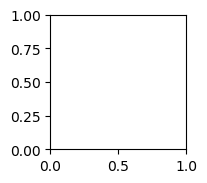

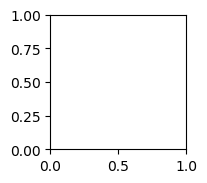

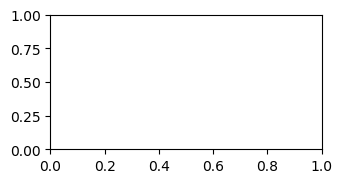

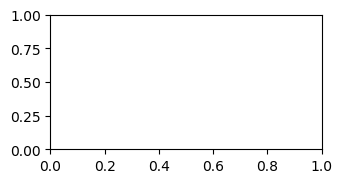

In [43]:
shapes = ['c-1', 'c-2','c-3', 'c-10']
w = 7/4 # full width 
h = w # square-ish figure


f1, ax1 = plt.subplots(1,1,figsize = (w,h))
f2, ax2 = plt.subplots(1,1,figsize = (w,h))
f3, ax3 = plt.subplots(1,1,figsize = (w*2,h))
f4, ax4 = plt.subplots(1,1, figsize = (w*2,h))

# # Create inset of width 30% and height 40% of the parent axes' bounding box
# # at the lower right corner (loc=4)
# axin1 = inset_axes(ax1, width="10%", height="30%", loc=4)
# axin2 = inset_axes(ax2, width="10%", height="30%", loc=4)
# axin3 = inset_axes(ax3, width="10%", height="30%", loc=4)

# for axin in [axin1, axin2, axin3]:
#     axin.tick_params(labelleft=False, labelbottom=False)

In [7]:
def CorloredTrajectory(ax, x_gauss, y_gauss, circ_r, color_vector, colormap):
    
#     f, ax = plt.subplots(1,1,figsize = (w,h))
    
    plt.style.use('default')
    ax.set_facecolor('black')
    
#     axin = inset_axes(ax, 
#                        width="5%", 
#                        height="30%", 
#                        loc=4)

    c1 = plt.Circle((0, 0), circ_r, facecolor='linen', alpha = 0.7, 
                    edgecolor='none', zorder = -3)
    ax.add_artist(c1)

    im = ax.scatter(x_gauss, y_gauss, s=0.5,
                c = color_vector, 
                cmap = colormap, 
               zorder = 1)
    ax.set_xlim(-circ_r*2, circ_r*2)
    ax.set_ylim(-circ_r*2, circ_r*2)
    ax.set_aspect('equal', adjustable = 'datalim')
    ax.tick_params(axis = 'both',
                which = 'both',
                bottom = False,
                left = False,
                labelbottom = False,
                  labelleft = False)
    
#     cbar = plt.colorbar(im, axin)
#     axin.tick_params(labelsize=6)
#                       labelcolor='white')
#     return(cbar)

In [8]:
# draw all 3 plots for first visit

In [9]:
first = ['c-1_m13', 'c-2_m20','c-3_m10', 'c-10_m11']
last = ['c-1_m14', 'c-2_m23', 'c-3_m9', 'c-10_m11']

In [10]:
output = r"..\dataFolders\PaperPipelineOutput\Figures\v2\Paper/"

In [11]:
direc1 = r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/FirstVisit/"
datalist1 = glob.glob(direc1 + '*.csv')
direc2 = r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/LastVisit/"
datalist2 = glob.glob(direc2 + '*.csv')

v = ['first_', 'last_']
jj = 0
for names, datalist in zip([first, last], [datalist1, datalist2]):
    
    visit = v[jj]
    for n in names:
        print(visit, n)
        data = [f for f in datalist if n in f][0]
        df = pd.read_csv(data)

        circ_r = circ_parameters.loc[circ_parameters.mothID == n, 'circ_radii'].values

        x = df.loc[:, 'x_centered'].values
        y = df.loc[:, 'y_centered'].values
        r = df.loc[:,'radial_distance_normalized']
        angle = df.loc[:,'angle'].values
        time = np.arange(len(x))*1/100
        time1 = time/np.max(time)

        CorloredTrajectory(ax1, x, y, circ_r, time1, plt.cm.hot)
#         cb1.set_ticks([0,1])
        f1.savefig(r"../dataFolders/PaperPipelineOutput/Figures/v2/Paper/" + visit + n + '_time_v1.pdf')
        ax1.clear()
#         cb1.remove()
    
        CorloredTrajectory(ax2, x, y, circ_r, angle, plt.cm.cool)
#         cb2.set_ticks([0, 45, 90])
        f2.savefig(r"../dataFolders/PaperPipelineOutput/Figures/v2/Paper/" + visit + n + '_angle_v1.pdf')
        ax2.clear()
#         cb2.remove()
        
#         ax1.clear()
#         ax2.clear()
    jj+=1

first_ c-1_m13
first_ c-2_m20
first_ c-3_m10
first_ c-10_m11
last_ c-1_m14
last_ c-2_m23
last_ c-3_m9
last_ c-10_m11


In [23]:
brown = np.asarray([232, 136, 85])/256
green = np.asarray([123, 195, 104])/256
colors = [brown, green]
colors[0]

# plt.plot(np.linspace(0,10), color = colors[1])

array([0.90625   , 0.53125   , 0.33203125])

In [44]:
shape = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
brown = np.asarray([232, 136, 85])/256
green = np.asarray([123, 195, 104])/256
colors = [brown, green]

for f in shapes:
    
        n_first = [n for n in first if f in n][0]
        path_first = [f for f in datalist1 if n_first in f][0]
        df_first = pd.read_csv(path_first)
        
        n_last = [n for n in last if f in n][0]
        path_last = [f for f in datalist2 if n_last in f][0]
        df_last = pd.read_csv(path_last)
        
        for df, cc in zip([df_first, df_last], colors):
            
            r = df.loc[:,'radial_distance_normalized']
            angle = df.loc[:,'angle'].values
            time = np.arange(len(r))*1/100
            
            ax3.plot(time, r, color = cc, linewidth = 1)
            ax3.set_xlim([0, 14.5])
            ax3.set_ylim([0, 2])

            ax4.scatter(time, r, s= 0.5,
                    c = angle, 
                    cmap = plt.cm.cool)
            ax4.set_xlim([0, 14.5])
            ax4.set_ylim([0, 2])

        f3.savefig(r"../dataFolders/PaperPipelineOutput/Figures/v2/Paper/"+ f + '_sweep_v1.pdf')
        ax3.clear()
        
        f4.savefig(r"../dataFolders/PaperPipelineOutput/Figures/v2/Paper/" + f + '_AnglecoloredSweep_v1.pdf')
        ax4.clear()